<h1> Generalised Linear Regression

Here, we are using the 'electricity consumption' dataset- which has two variables year and electricity consumption to build a generalised Linear Regression

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn import metrics

In [34]:
df = pd.read_csv("total-electricity-consumption-us .csv")
df.head()

,Year,Consumption
0,1920,57125
1,1921,53656
2,1922,61816
3,1923,72113
4,1924,76651


In [35]:
df.shape

(51, 2)

In [36]:
# checking NA
df.isnull().sum()

Year           0
Consumption    0
dtype: int64

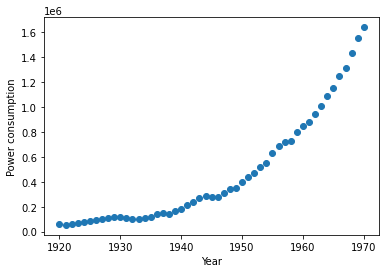

In [37]:
# we can see that there are no null values in the data.
# Hence, proceeding with plotting the data
fig,ax= plt.subplots()
ax.set_xlabel("Year")
ax.set_ylabel("Power consumption")
ax.scatter(df.Year,df.Consumption)
plt.show()

In [38]:
# here Y changes in a non linear fashion with x. Hence, we can fit a lnear model here.

In [39]:
size = len(df.index)
size

51

In [40]:
#splitting the data into train and test sets
index = range(0,size,5)

train = df[~df.index.isin(index)]
test = df[df.index.isin(index)]

print(len(train))
print(len(test))

40
11


In [41]:
# converting X to a two dimensional array, as required by the learning algorithm
X_train = train.Year.values.reshape(-1,1) #Making X two dimensional
y_train = train.Consumption

X_test = test.Year.values.reshape(-1,1) #Making X two dimensional
y_test = test.Consumption


y=-52161384.1+27054.73x


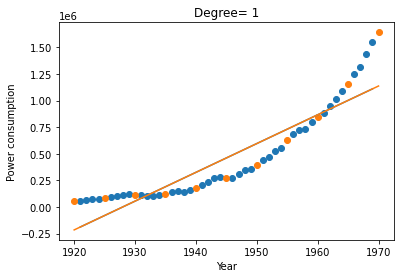

y=3303319197.49+-3423500.17x+887.03x^2


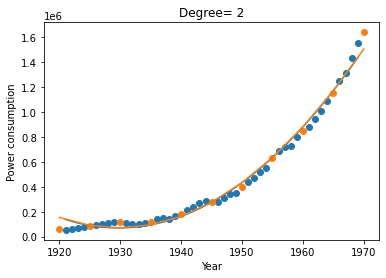

y=-111194610547.9+173191558.93x+-89920.6x^2+15.56x^3


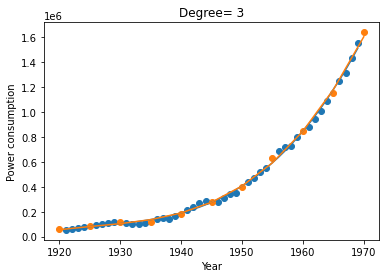

In [42]:
# doing a polynomial regression: Comparing linear , quadratic and cubic fits
# Pipeline helps you associate two models or objects to be built sequentially with each other,
# in this case, the objects are PolynomialFeatures() abd linearregression()

r2_train =[]
r2_test =[]
degrees = [1,2,3]

for degree in degrees:
    pipeline = Pipeline([ ('poly_features',PolynomialFeatures(degree=degree)),
                           ('model',LinearRegression())])
    pipeline.fit(X_train,y_train)
    y_pred = pipeline.predict(X_test)
    r2_test.append(metrics.r2_score(y_test,y_pred))
    
    y_pred_train = pipeline.predict(X_train)
    r2_train.append(metrics.r2_score(y_train,y_pred_train))
    

#plot predictions an actual values against year
    fig,ax = plt.subplots()
    ax.set_xlabel("Year")
    ax.set_ylabel("Power consumption")
    ax.set_title("Degree= " +str(degree))
    
    terms = zip(list(pipeline['model'].coef_[1:]),
                pipeline['poly_features'].get_feature_names()[1:])
  
    print("y=" +str(round(pipeline['model'].intercept_,2))+"+"+\
         "+".join([str(round(x,2))+y.replace("0","")for x,y in terms]))
    
    
    ax.scatter(X_train,y_train)
    ax.plot(X_train, y_pred_train)
    
    ax.scatter(X_test,y_test)
    ax.plot(X_test, y_pred)
    
    plt.show()
    

    # when degree = 1 we only have x
    # for degree 2 we have x^2, and second graph in comaprision with first is doing better than the one.
    # this is slightly better fit compared to first
    # for cubic equations

In [43]:
print(degrees)
print(r2_train)
print(r2_test)

[1, 2, 3]
[0.8423747402176137, 0.990889674455328, 0.9979789884378093]
[0.816517046382681, 0.9876080502746136, 0.9984899918580936]


In [44]:
# we can see that cubic poynomial gives the best fit (highest R square) for both test and train

In [45]:
# for cubic polynomial for test data we have 99.8 and 99.7 for train.
# typically we need the r2 score for test data should be as good as train data. 
# (much lower or significantly lower than training)


In [46]:
# in the above model basically the output variable or target variable consumption is 
# continuous.

## what if the output variable is categorical- we can find as below-

# consider the dataset student competion awards data. Where in we have math grades and we need to predict how many awards they can win.
# out outcome or output feature is awards ranging from [0-6]

# if we build model using GLM and apply regression we might get fraction errors while tring to predict the model.

# hence we use poisson regreeor here.

# Poisson regression

In [47]:
from sklearn.linear_model import PoissonRegressor
from sklearn.pipeline import Pipeline
from sklearn import metrics
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
df = pd.read_csv("competition_awards_data.csv",sep=",",header=0)
df.head()

,Awards,Math Score
0,0,43
1,0,38
2,0,41
3,0,33
4,0,39


In [49]:
df.shape

(200, 2)

In [50]:
# cehckling null values if any
df.isnull().sum()

Awards        0
Math Score    0
dtype: int64

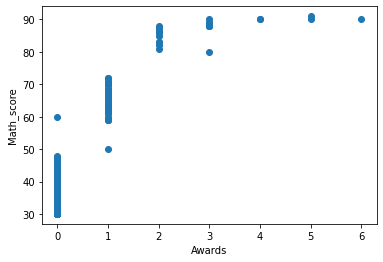

In [51]:
#plotting awards against Math score
fig,ax = plt.subplots()
ax.set_xlabel("Awards")
ax.set_ylabel("Math_score")
ax.scatter(df.Awards,df['Math Score'])
plt.show()

In [52]:
# plotting the graph we can see that expected awards are integer values and
# highest awards number is 6.
# for 0 awards there is some variation in the math score with one outlier
# same pattern can be seen in the other number of awards.
# basically fitting in linear model, we will get a continuous output of values between 0-6, for each of those predicted values we get some fraction of error between actual and predicted values.

# So here instead of using Linear model we will use poisson distribution.

#Poisson distribution is mostly used for the count data as of above.
#the main assumption of the poission distribution is mean=variance wherein the data is equidistributed.
#but in reality we can hardly get the same.
# because of this assumption. SOmetimes we might not use poisson distribution while training the dat

C:\Users\dpriyareddypothul\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


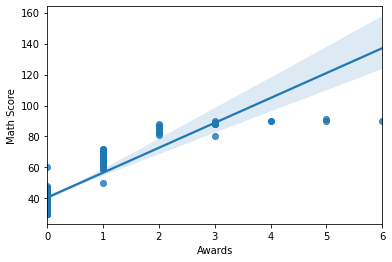

In [53]:
fig,ax = plt.subplots()
ax.set_xlabel("Awards")
ax.set_ylabel("Math_score")
sns.regplot(df.Awards,df['Math Score'])
plt.show()

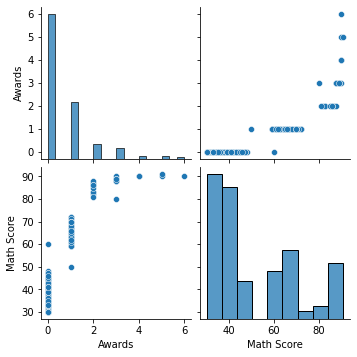

In [54]:
sns.pairplot(df)

In [55]:
size = len(df)
size

200

In [56]:
index = range(0,size,5)

train = df[~df.index.isin(index)]
test = df[df.index.isin(index)]

In [57]:
print(len(train))
print(len(test))

160
40


In [58]:
#defining X and y for model training and test

X_train = train['Math Score'].values.reshape(-1,1)
y_train = train.Awards

In [59]:
X_test = test['Math Score'].values.reshape(-1,1)
y_test = test.Awards

In [60]:
# doing the polynomial regression: comparing linear, qadratic and cubic fits
# Pipeline helps you associate two models or objects to be built sequentially with each other,
# in this case, PoissonRegressoe() is only object

pipeline = Pipeline([('model',PoissonRegressor())])
pipeline.fit(X_train,y_train)
y_pred = pipeline.predict(X_test)
r2_test = metrics.r2_score(y_test,y_pred)

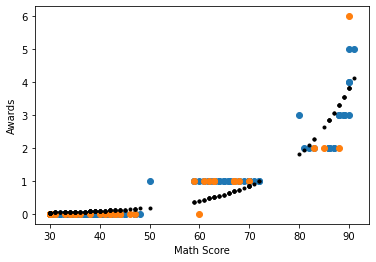

In [61]:
# train performance
y_pred_train = pipeline.predict(X_train)
r2_train = metrics.r2_score(y_train,y_pred_train)

fig,ax = plt.subplots()
ax.set_xlabel("Math Score")
ax.set_ylabel("Awards")

ax.scatter(X_train,y_train)
ax.plot(X_train,y_pred_train,'.',color='black')

ax.scatter(X_test,y_test)
ax.plot(X_test,y_pred,'.',color='black')

plt.show()

In [62]:
print(r2_test)
print(r2_train)

0.8023593129776402
0.8902479195335574


In [63]:
eval = pd.DataFrame({'y_pred': [round(y, 0) for y in y_pred], 'y': y_test}).reset_index()

In [64]:
print('Frequency table')
eval.groupby(['y', 'y_pred']).agg('count').reset_index().pivot(index='y', columns='y_pred', values='index').fillna(0)

Frequency table


y_pred,0.0,1.0,2.0,3.0,4.0
y,,,,,
0,26.0,0.0,0.0,0.0,0.0
1,3.0,7.0,0.0,0.0,0.0
2,0.0,0.0,1.0,2.0,0.0
6,0.0,0.0,0.0,0.0,1.0


In [65]:
# based on above table we can see that for y=1 , 3 counts are predicted incorrectely.Similary for the count y=2.